# Prayas Jadaun
## 2301560025
## MCA-A
### AI & Machine Learning

## 🗂️ Project Overview
Objective: Utilize statistical features extracted from image data represented in the columns VWTI, SWTI, CWTI, and EI to perform a classification task denoted by the 'Class' column.

## 📝 Summary
* VWTI (Variance of Wavelet Transformed Image): Represents the variance of wavelet transformed images, indicating the spread of pixel values.
* SWTI (Skewness of Wavelet Transformed Image): Denotes the asymmetry of pixel intensity distribution in the wavelet transformed images.
* CWTI (Curtosis of Wavelet Transformed Image): Indicates the tailedness or sharpness of pixel intensity distribution in the wavelet transformed images.
* EI (Entropy of Image): Measures the randomness or unpredictability within the images.
* Class: A categorical feature defining the authenticity of banknotes, likely representing fake or genuine notes.

# 📊 Data Set Information:
* VWTI (Variance of Wavelet Transformed Image): Represents the variance of wavelet transformed images, describing the spread of pixel values in the images.* 
SWTI (Skewness of Wavelet Transformed Image): Indicates the asymmetry of pixel intensity distribution in the wavelet transformed images.* 
CWTI (Curtosis of Wavelet Transformed Image): Represents the tailedness or sharpness of pixel intensity distribution in the wavelet transformed images* .
EI (Entropy of Image): Quantifies the randomness or unpredictability within the image* s.
Class: A categorical feature denoting the authenticity or genuineness of banknotes, likely with binary values representing fake or genuine notes.
tes.-lazypredict)

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import warnings 
warnings.simplefilter('ignore')
%matplotlib Inline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

### Read Data

In [2]:
df = pd.read_csv("E:\My Environment\MCA Notes\Assignments\AI & ML Assignments\(bank)note.csv")
df.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


### Data Visualization:

#### Histogram of VWTI: Display a histogram to visualize the distribution of Variance of Wavelet Transformed Image.

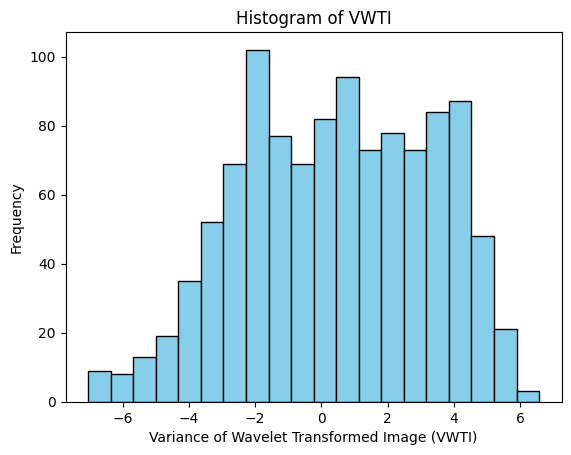

In [3]:
df['VWTI'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Variance of Wavelet Transformed Image (VWTI)')
plt.ylabel('Frequency')
plt.title('Histogram of VWTI')
plt.grid(False)
plt.show()

#### Boxplot of SWTIs: Create a boxplot to compare the skewness of Wavelet Transformed Images.

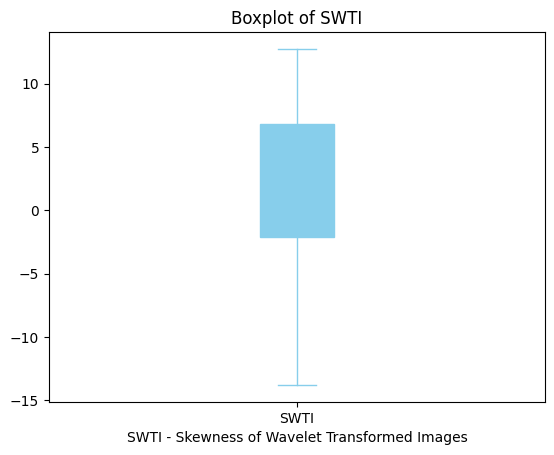

In [4]:
df['SWTI'].plot(kind='box', color='skyblue', patch_artist=True)
plt.xlabel('SWTI - Skewness of Wavelet Transformed Images')
plt.title('Boxplot of SWTI')
plt.grid(False)
plt.show()

#### Scatter Plot: VWTI vs. EI: Plot a scatter plot to explore the relationship between Variance of Wavelet Transformed Image and Entropy of Image.

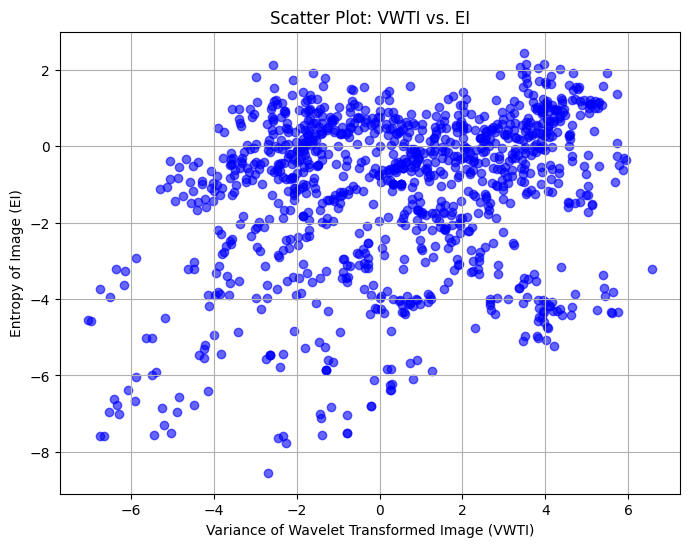

In [5]:
plt.figure(figsize=(8, 6))  
plt.scatter(df['VWTI'], df['EI'], color='blue', alpha=0.6)  
plt.title('Scatter Plot: VWTI vs. EI')  
plt.xlabel('Variance of Wavelet Transformed Image (VWTI)')  
plt.ylabel('Entropy of Image (EI)')  
plt.grid(True) 
plt.show()  

#### Pairplot for Correlations: Utilize Seaborn's pairplot to visualize pairwise relationships across all numerical columns.

<Figure size 1000x800 with 0 Axes>

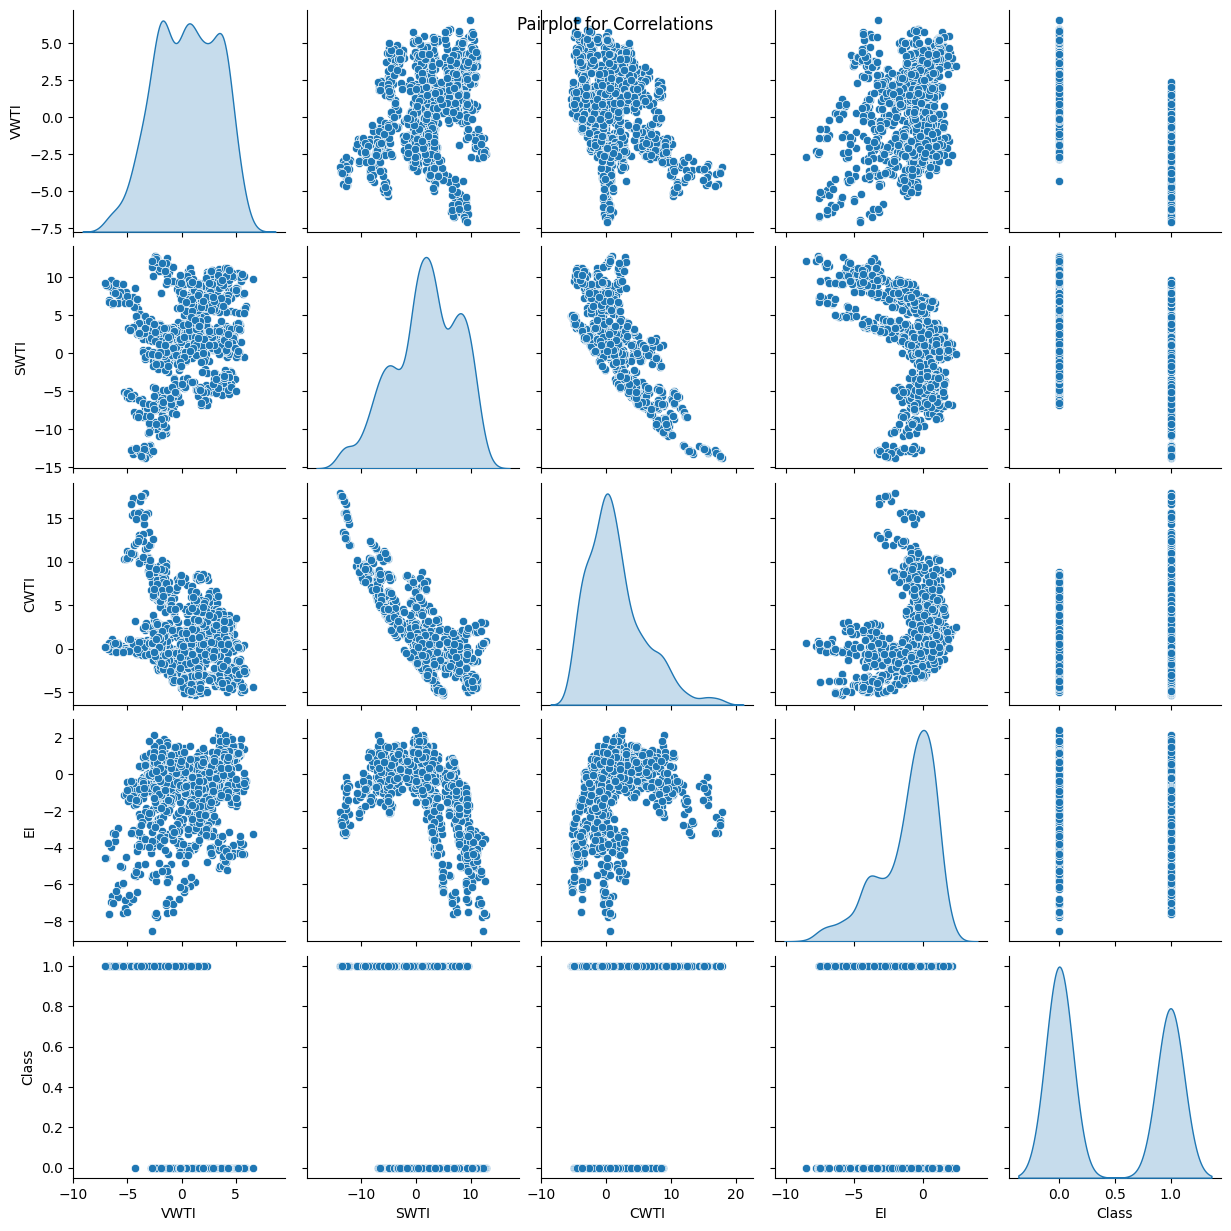

In [6]:
plt.figure(figsize=(10, 8))  
sns.pairplot(df, diag_kind='kde')  
plt.suptitle('Pairplot for Correlations')  
plt.show()  

#### Joint Plot: VWTI and Class: Create a joint plot to observe the relationship between Variance of Wavelet Transformed Image and Class.

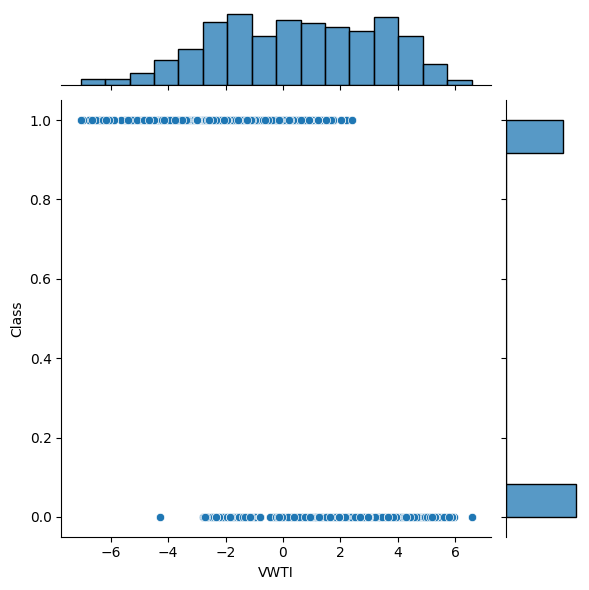

In [7]:
sns.jointplot(x='VWTI', y='Class', data=df)
plt.show() 

#### Violin Plot: SWTIs by Class: Use a violin plot to compare the skewness across different classes.

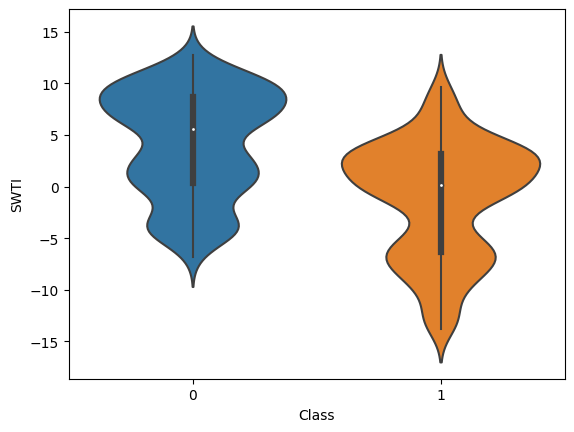

In [8]:
sns.violinplot(x='Class', y='SWTI', data=df)
plt.show()  

#### Heatmap of Correlations: Generate a heatmap to visualize the correlations between all numerical columns.

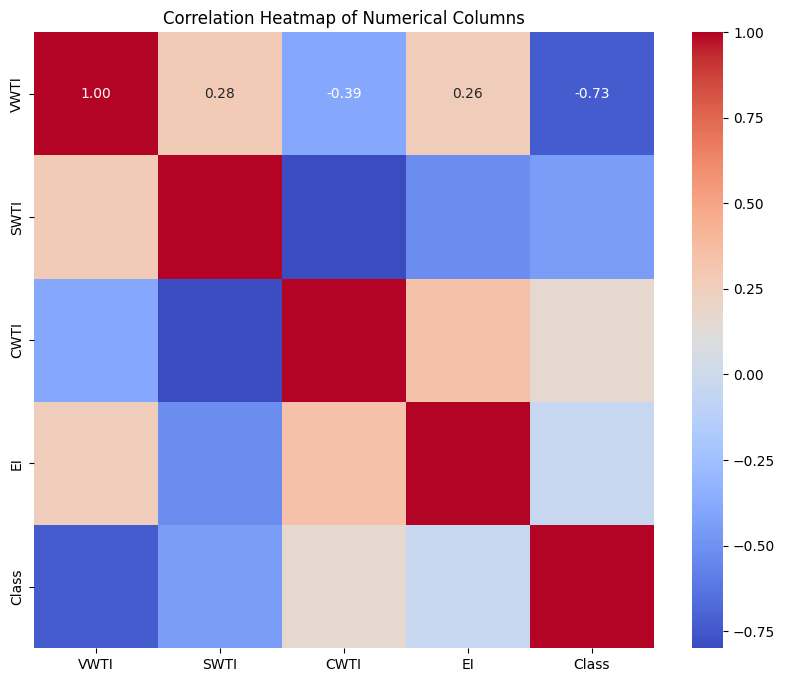

In [9]:
# Creating a correlation matrix and generating a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()  # Display the plot

## KNN Classification

### How to implement K-nearest neighbors (KNN) classification ?

In [10]:
X = df[['VWTI', 'SWTI', 'CWTI', 'EI']]
y = df['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        85

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



### What are the steps to preprocess and normalize the columns (VWTI, SWTI, CWTI, EI) before applying KNN classification?

In [13]:
scaler = StandardScaler()

df[['VWTI', 'SWTI', 'CWTI', 'EI']] = scaler.fit_transform(df[['VWTI', 'SWTI', 'CWTI', 'EI']])

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(df[['VWTI', 'SWTI', 'CWTI', 'EI']], df['Class'])


KNeighborsClassifier()

### How to determine the optimal number of neighbors (k) for the KNN classifier ?

In [14]:
X = df[['VWTI', 'SWTI', 'CWTI', 'EI']]
y = df['Class']

k_scores = {}

for k in range(1, 21): 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
    k_scores[k] = np.mean(scores)

best_k = max(k_scores, key=k_scores.get)
print(f"Optimal k: {best_k}")


Optimal k: 2


####  How to visualize the distribution of data in the VWTI, SWTI, CWTI, EI columns before KNN classification?

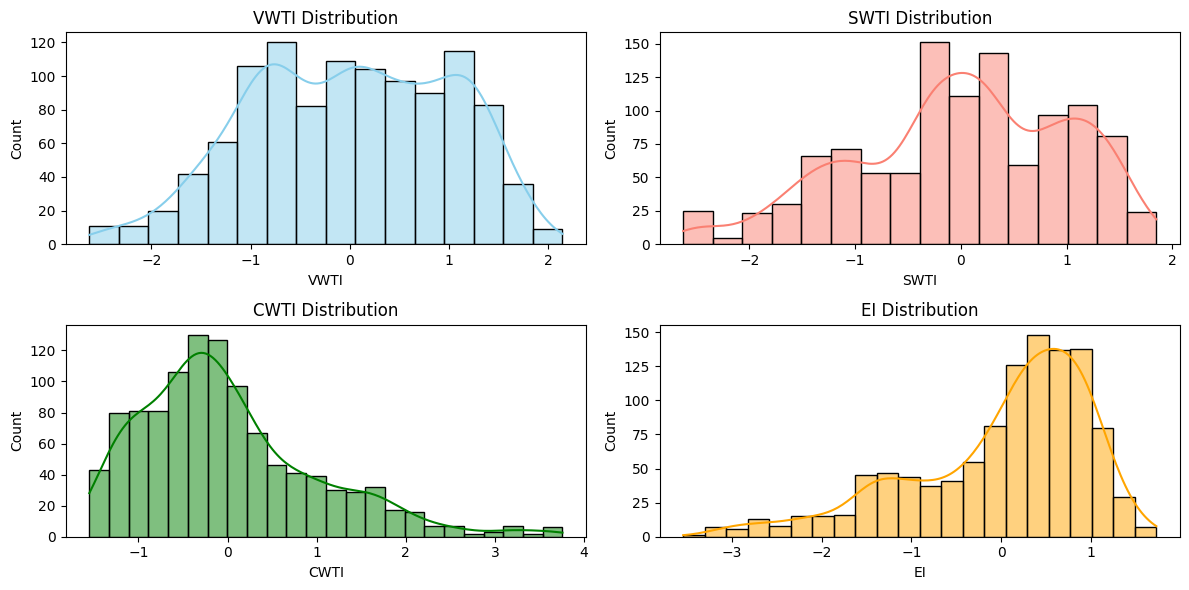

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['VWTI'], kde=True, color='skyblue')
plt.title('VWTI Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['SWTI'], kde=True, color='salmon')
plt.title('SWTI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['CWTI'], kde=True, color='green')
plt.title('CWTI Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['EI'], kde=True, color='orange')
plt.title('EI Distribution')

plt.tight_layout()
plt.show()

#### Can outliers in the dataset columns affect the performance of KNN classification, and how to address them?

In [16]:
from scipy import stats

z_scores = stats.zscore(df[['VWTI', 'SWTI', 'CWTI', 'EI']])

threshold = 3

outliers = (abs(z_scores) > threshold).any(axis=1)
data_no_outliers = df[~outliers]

# Alternatively, cap or floor outliers
data_capped = df.copy()
data_capped[z_scores > threshold] = threshold
data_capped[z_scores < -threshold] = -threshold


##### Visualization: Use boxplots or scatter plots to identify outliers in the dataset columns like 'VWTI', 'SWTI', 'CWTI', and 'EI'.

###### Z-Score or IQR Method: Calculate the Z-score or Interquartile Range (IQR) for each column to detect outliers. Remove or handle data points beyond a certain threshold (e.g., Z-score > 3 or outside 1.5 * IQR range).

###### Robust Scaler: Apply a Robust Scaler to scale features, making the model less sensitive to outliers during training.

### What are the key assumptions and limitations of the KNN algorithm for classification tasks?

In [17]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

KNeighborsClassifier()

#### Assumptions:
###### Localized Decision Boundary: KNN assumes that data points within close proximity in feature space share similar labels. It works well when the decision boundary is localized.
###### Feature Relevance: Assumes all features are equally relevant. If some features are more relevant than others, it might affect the classification performance.
#### Limitations:
###### Computational Complexity: KNN can be computationally expensive for large datasets as it requires calculating distances between the query point and all training samples.
###### Sensitive to Outliers: Outliers or noise in the data can significantly impact the KNN algorithm's performance.
###### Curse of Dimensionality: As the number of features increases, the feature space becomes sparse, making it challenging to identify nearest neighbors accurately.
###### Imbalanced Data: Performs poorly with imbalanced datasets where one class significantly outnumbers the others, leading to bias in prediction.
###### Scalability: KNN doesn't learn a discriminative function, making it less suitable for high-dimensional data.

#### How does changing the distance metric (e.g., Euclidean, Manhattan) impact KNN classification using the specified columns ?

In [18]:
selected_cols = ['VWTI', 'SWTI', 'CWTI', 'EI', 'Class']
data_selected = df[selected_cols]

X = data_selected.drop('Class', axis=1)
y = data_selected['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy with Euclidean distance: {accuracy_euclidean}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan}")


Accuracy with Euclidean distance: 0.9954545454545455
Accuracy with Manhattan distance: 0.9954545454545455


#### What are the steps for preprocessing data for KNN classification, specifically focusing on normalization or scaling?

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after normalization: {accuracy}")


Accuracy after normalization: 0.9954545454545455


#### Is it recommended to apply feature selection techniques before KNN classification ?

In [20]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

y_pred = knn.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy}")


Accuracy after feature selection: 0.9863636363636363


#### How to deal with multicollinearity among features in the dataset before implementing KNN classification?

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

accuracy = knn.score(X_test_scaled, y_test)
print(f"Accuracy after dealing with multicollinearity: {accuracy}")


Accuracy after dealing with multicollinearity: 0.9954545454545455


#### What are the differences in implementing KNN from scratch versus using scikit-learn for classification ?

In [22]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def get_neighbors(train, test_row, num_neighbors):
    distances = []
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = [dist[0] for dist in distances[:num_neighbors]]
    return neighbors

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [23]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(f"Accuracy using scikit-learn: {accuracy}")


Accuracy using scikit-learn: 0.9954545454545455


###### Differences:
###### Complexity: Implementing from scratch requires coding distance metrics, neighbor selection, and predictions, whereas scikit-learn abstracts these complexities.
###### Ease of Use: Scikit-learn provides a simple and efficient interface, allowing quick model implementation.
###### Performance: Scikit-learn is optimized and often faster due to underlying optimizations.

#### How does the size of the training set affect the performance of KNN classification for the given columns?

In [24]:
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(X, y, test_size=0.2, random_state=42)

# Vary the size of the training set
training_sizes = [0.2, 0.4, 0.6, 0.8]

for size in training_sizes:
    X_train, _, y_train, _ = train_test_split(X, y, test_size=1-size, random_state=42)
    
    # Initialize and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the hyperparameters
    knn.fit(X_train, y_train)
    
    # Evaluate performance on fixed testing set
    y_pred = knn.predict(X_test_fixed)
    accuracy = accuracy_score(y_test_fixed, y_pred)
    print(f"Training size: {size}, Accuracy: {accuracy}")


Training size: 0.2, Accuracy: 0.9863636363636363
Training size: 0.4, Accuracy: 0.990909090909091
Training size: 0.6, Accuracy: 0.9954545454545455
Training size: 0.8, Accuracy: 0.9954545454545455
